# 5. Classification and Cross-Validation

**Instructions:**
* go through the notebook and complete the **tasks** .  
* Make sure you understand the examples given!
* When a question allows a free-form answer (e.g., ``what do you observe?``) create a new markdown cell below and answer the question in the notebook.
* ** Save your notebooks when you are done! **

In the previous lab, we loaded up the iris dataset for flower classification, and performed simple exploratory data analysis, i.e., we visualized the data available (features given class labels) in order to understand characteristics of the data (e.g., that some classes are easier to be separated from others based on some features, etc.)

If you don't remember much about this, please revisit the corresponding lab (Lab 2) before moving on.

In this lab, we will go through the process of actually training a classifier on a dataset (training set), and evaluating the performance of the classifier on unknown data (test set)

<hr>
<span style="color:rgb(170,0,0)">**Task:**</span> Run the cell below to load our data. Notice the last line, where we add some random Gaussian noise to our data to make the task more challenging (data in real life usually contains some form of noise).

In [28]:
%matplotlib inline


from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt

iris = datasets.load_iris()

#view a description of the dataset (uncomment next line to do so)
print(iris.DESCR)

#Set X a samples times features matrix, Y equal to the targets
X=iris.data 
y=iris.target 


#we add some random noise to our data to make the task more challenging
X=X+np.random.normal(0,0.4,X.shape)

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

    :Missing Attribute Values: None
  

<hr>
<span style="color:rgb(170,0,0)">**Task:**</span> How many data samples do we have?  Print the value below using ``shape`` on X appropriately.

In [29]:
print (X.shape[0])

150


<hr>
<span style="color:rgb(170,0,0)">**Task:**</span> How many features do we have?  Print the value below using ``shape`` on X appropriately.

In [30]:
print (X.shape[1])

print (y)

4
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


<hr>
<span style="color:rgb(170,0,0)">**Task:**</span> How many classes do we have?  Print the value below using ``np.unique`` appropriately.

3


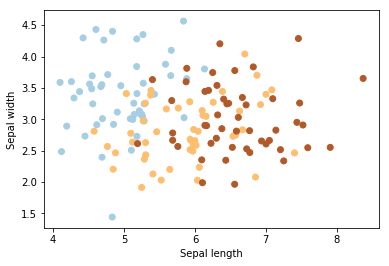

In [31]:
unqs=np.unique(y)
print(unqs.shape[0])

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

<hr>
<span style="color:rgb(170,0,0)">**Task:**</span> How many samples do we have that belong to class 1?  Use the ``np.where`` function appropriately on y to print this in the cell below.

In [32]:
print(np.where(y==1)[0].size)

50


<hr>
<span style="color:rgb(170,0,0)">**Task:**</span> Assume we want to generate a list of shuffled indices of our data.  Use the function ``numpy.random.permute`` to do that.  In the cell below, you can already see how to create a list of indices that is **not** shuffled.

In [33]:
L=list(range(X.shape[0]))
L=np.random.permutation(L)
print(L)

[124 110  94 149  47 128 136  71 111  87 138  49  14  38  45  62  27 130
  76  29  93 112  78 117  81  16 101  19  58 142  80 107 132  30   9 120
 139  18 148 126 140  91 104  22  70   7   4   1  74  65 103  82  95  44
 119  42 113 141  17  13  57 127 145  55  15  31  75  28  84  66  60 143
  83  53 137   5 100  50 118 109  69  23  98  63  54  97 147 115 121  39
  72 105 133 146  90  41 106  86 144  20 131   0  21  89  24  88 123  37
  64 125  85  96 122  59   6  10  67  35  11 114 116  46 129  92  12  56
   3  34 134  48   8  32  68  73 108  99  25  33  36  61  43  79   2  40
  51 102  52 135  77  26]


<hr>
<span style="color:rgb(170,0,0)">**Task:**</span> Here is an example of using the k-NN classifier.  We split our data to training and testing (with a 0.2 percentage for our test data), fit on the training data, test on the testing data.  Go through the code and make sure you understand it.  Subsequently, do the same for the next cell, that prints the confusion matrix and the total accuracy.  (documentation: http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)

**note: for this lab, we use the euclidean distance along with 10 neighbours**

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

#split to train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
#define knn classifier, with 5 neighbors and use the euclidian distance
knn=KNeighborsClassifier(n_neighbors=5, metric='euclidean')
#define training and testing data, fit the classifier
knn.fit(X_train,y_train)
#predict values for test data based on training data
y_pred=knn.predict(X_test)
#print values
print(y_test) # true values
print(y_pred) # predicted values

[1 1 2 0 2 0 1 2 0 1 1 1 0 2 0 2 0 1 2 0 0 1 2 2 0 0 0 1 0 2]
[1 1 1 0 1 0 2 2 0 1 1 2 0 2 0 2 0 1 1 0 0 1 2 2 0 0 0 1 0 2]


In [35]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))

[[12  0  0]
 [ 0  7  2]
 [ 0  3  6]]
0.833333333333


<hr>
<span style="color:rgb(170,0,0)">**Task:**</span> Write your **own** functions that return the confusion matrix given the true and predicted labels, as well as the accuracy.  To do so, fill in the code in the next two cells.

In [36]:
#create a matrix with entries equal to zero, and subsequently build the confusion matrix
#the method should return the confusion matrix in a numpy array
def myConfMat(y_test,y_pred,classno):
    C=np.zeros((classno,classno)) # initialize the confusion matrix to zeros
    #loop through all results and update the confusion matrix
    for i in range (len(y_test)):
        C[y_test[i]][y_pred[i]]+=1
    return C

#note: len(np.unique(y))  indicates the dimensions of the confusion matrix (why?)
print(myConfMat(y_test,y_pred,len(np.unique(y))))

[[ 12.   0.   0.]
 [  0.   7.   2.]
 [  0.   3.   6.]]


In [37]:
#use the numpy function where to return the accuracy given the true/predicted labels.  i.e., #correct/#total
def myAccuracy(y_test,y_pred):
    mistakes=0
    for i in range (len(y_test)):
        if (y_test[i]!=y_pred[i]): mistakes+=1
    return 1-mistakes/len(y_test)
    
    
print(myAccuracy(y_test,y_pred))

0.8333333333333334


<hr>
<span style="color:rgb(170,0,0)">**Task:**</span> Write your own cross-validation function.  In this case, we are using a fixed distance (euclidean) and a fixed number of neighbours (10) so we do **not** need to create a validation set.

Your function (see cell below) firstly splits the indices of each of our data into bins according to the number of folds (here: 5-fold).

Then, you should loop through all folds, split the data into training and testing by selecting the appropriate bins (see slides on cross-validation), train on training data and save the test result as the accuracy for each fold (see list accuracy_fold).  This is the list that your function should return in the end.  Remember that the ``extend`` function extends a list with more values.  

The final print call in the end of the cell should print the list of accuracies, with five values, one for each fold.

In [43]:
def myCrossVal(X,y,foldK,neighbs):
    accuracy_fold=np.zeros(foldK) #list to store accuracies folds
    
    
    #TASK: use the function np.random.permutation to generate a list of shuffled indices from in the range (0,number of data)
    #(you did this already in a task above)
    indices=np.random.permutation(np.arange(len(X)))
    #print(indices)
    
    #TASK: use the function array_split to split the indices to k different bins:
    #uncomment line below
    bins=np.split(indices,foldK)
    #print(bins)
    
    
    #loop through folds
    for foldNum in range(0,foldK):
        foldTrain=np.delete(bins[foldNum],foldNum) # list to save current indices for training
        foldTest=bins[foldNum] # list to save current indices for testing
        #TASK: take bin i for testing, rest for training.  Can use the function extend to add indices to foldTrain and foldTest
        #train kNN classifier
        #features=X.shape[1]
        #for currentTest in range(0,len(foldTest)):
        #    distances=np.zeros((len(foldTrain)))
        #    for currentTrain in range (0,len(foldTrain)):
        #        for j in range (0,features):
        #            distances[currentTrain]+=np.square(X[foldTrain[currentTrain],j]-X[foldTest[currentTest],j])
        #    bestDists=np.argsort(distances)
        knn=KNeighborsClassifier(n_neighbors=5, metric='euclidean')
        #define training and testing data, fit the classifier
        knn.fit(X[foldTrain],y[foldTrain])
        #predict values for test data based on training data
        y_mypred=knn.predict(X[foldTest])
        mistakes=0;
        #for i in range (0,len(foldTest)):
        #    if (y[foldTest[i]]!=y_mypred[i]): mistakes+=1;
        
        print(foldNum)
        print(accuracy_fold)
        #accuracy_fold[foldNum]=1-mistakes/len(foldTest)
        accuracy_fold[foldNum]=myAccuracy(y[foldTest],y_mypred)
        #test on test data
        #append the new accuracy to your accuracy_fold list.  You can use accuracy_score or your myAccuracy function.
    return accuracy_fold;
    
accuracy_fold=myCrossVal(X,y,5,5)
print(accuracy_fold)

0
[ 0.  0.  0.  0.  0.]
1
[ 0.9  0.   0.   0.   0. ]
2
[ 0.9         0.86666667  0.          0.          0.        ]
3
[ 0.9         0.86666667  0.93333333  0.          0.        ]
4
[ 0.9         0.86666667  0.93333333  0.96666667  0.        ]
[ 0.9         0.86666667  0.93333333  0.96666667  0.86666667]


<hr>
<span style="color:rgb(170,0,0)">**Task:**</span> Print the average accuracy and standard deviation of your results over the 5 folds. (functions ``mean`` and ``std``)

In [39]:
print(np.mean(accuracy_fold))
print(np.std([90,90,95,90,20]))

1.0
28.5657137142


In [40]:
#######################################